
## Observations and Insights 
1. The bar graph showing the number of mice across the drug regimen is reasonably consisted at around 25 mice per drug/treatment. Only 2 of the 10 drugs have 24 mice in the study. This may be due to duplicates that were cleaned out of the dataset. This shows that the number of samples for analysis is within reason and results were not skewed. Similarly we can be reasonably confident that there is no gender bias as the pie chart shows a distribution of 51:49 male vs. female distribution.

2. Correlation between the Capomulin mice weight and average tumour volume was calculated to be 0.84 proving a strong positive correlation. Therefore, the larger the mouse weight, the larger average volume of the tumour expected.

3. The Capomulin mice scatter plot regression analysis revealed that the r-squared value of ~0.708 meaning for a given sample observed, the best line of fit would be around the mean 70% of the time. 

4. The box-plot concludes that Capomulin and Ramicane are the most effective drugs showing the lowest and comparable average tumor volume at the end of the 45 day study.


In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [95]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [96]:

# Combine the data into a single dataset
merged_results = pd.merge(mouse_metadata,study_results, on=["Mouse ID"])
# Display the data table for preview
merged_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice.
numUniqueMice = len(merged_results["Mouse ID"].unique())
numUniqueMice

249

In [98]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateMice_timepoint_df = merged_results[merged_results.duplicated(subset=["Mouse ID","Timepoint"], keep='first')]
duplicateMiceByID_df = pd.DataFrame(duplicateMice_timepoint_df["Mouse ID"].unique())
duplicateMiceByID_df

,0
0,g989


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicateMice_all_df = merged_results.loc[merged_results["Mouse ID"] == "g989" ] 
duplicateMice_all_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results_df = merged_results.loc[merged_results["Mouse ID"] != "g989"]
clean_mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
numMice_clean = len(clean_mouse_results_df["Mouse ID"].unique())
numMice_clean

248

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_mean = clean_mouse_results_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
grouped_mean

grouped_median = clean_mouse_results_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
grouped_median

grouped_var = clean_mouse_results_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
grouped_var

grouped_std = clean_mouse_results_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
grouped_std

grouped_sem = clean_mouse_results_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
grouped_sem

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_mouse_stats_df = pd.DataFrame({"mean": grouped_mean, "median": grouped_median, "var": grouped_var, 
                                  "standard deviation": grouped_std, "SEM": grouped_sem})
summary_mouse_stats_df


,mean,median,var,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_group_clean_mouse_results_df = clean_mouse_results_df.groupby("Drug Regimen")
# This method produces everything in a single groupby function
summary_mouse_stats_2_df = single_group_clean_mouse_results_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_mouse_stats_2_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

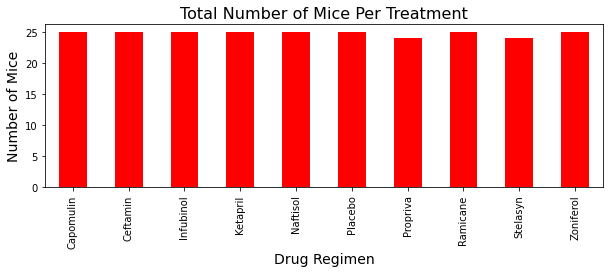

<Figure size 432x288 with 0 Axes>

In [104]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

micePerTreatment = clean_mouse_results_df.groupby(["Drug Regimen"])["Mouse ID"].nunique() #Question requests for number of mice NOT number of readings
micePerTreatment.plot(kind="bar", figsize=(10,3), color = 'r')

# Set a title & labels for the chart
plt.title("Total Number of Mice Per Treatment", fontsize=16 )
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.show()
plt.tight_layout()

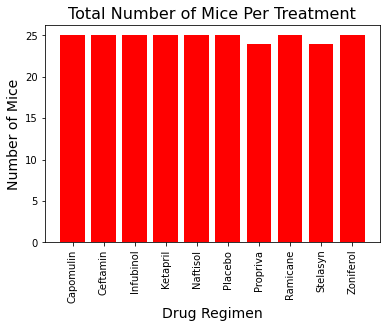

<Figure size 432x288 with 0 Axes>

In [105]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatments = clean_mouse_results_df["Drug Regimen"].unique()
#Sort alphabetically
treatments = sorted(treatments)

numMicePerTreatment = micePerTreatment
plt.bar(treatments, numMicePerTreatment, color='r', align="center",)
plt.xticks(rotation="vertical")

# Set a title & labels for the chart
plt.title("Total Number of Mice Per Treatment", fontsize=16 )
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.show()
plt.tight_layout()



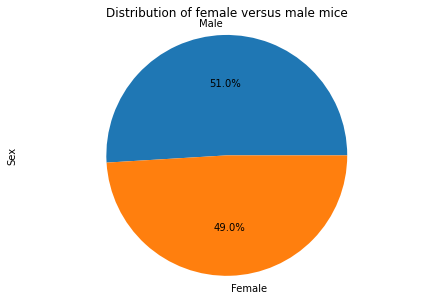

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mouse_data = clean_mouse_results_df["Sex"].value_counts()

gender_mouse_data.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
# plt.tight_layout()
plt.show()



In [107]:
gender_mouse_data


Male      958
Female    922
Name: Sex, dtype: int64

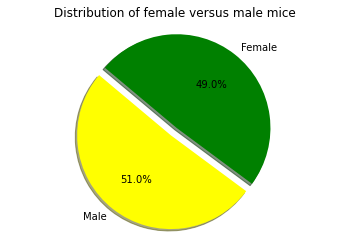

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["yellow", "green"]
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_mouse_data, explode=explode,labels=gender_mouse_data.index.values, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/pie_gender_pandas.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_mouse_results_df.loc[clean_mouse_results_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_results_df.loc[clean_mouse_results_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mouse_results_df.loc[clean_mouse_results_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mouse_results_df.loc[clean_mouse_results_df["Drug Regimen"] == "Ceftamin", :]

In [110]:
# Capomulin
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_mouse_results_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [111]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_mouse_results_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [112]:
# Infubinol 

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_mouse_results_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [113]:
# Ceftamin

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_mouse_results_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of treatment is: {upperq}")
print(f"The interquartile range of treatment is: {iqr}")
print(f"The the median of treatment is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of treatment is: 64.29983003
The interquartile range of treatment is: 15.577752179999997
The the median of treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []   

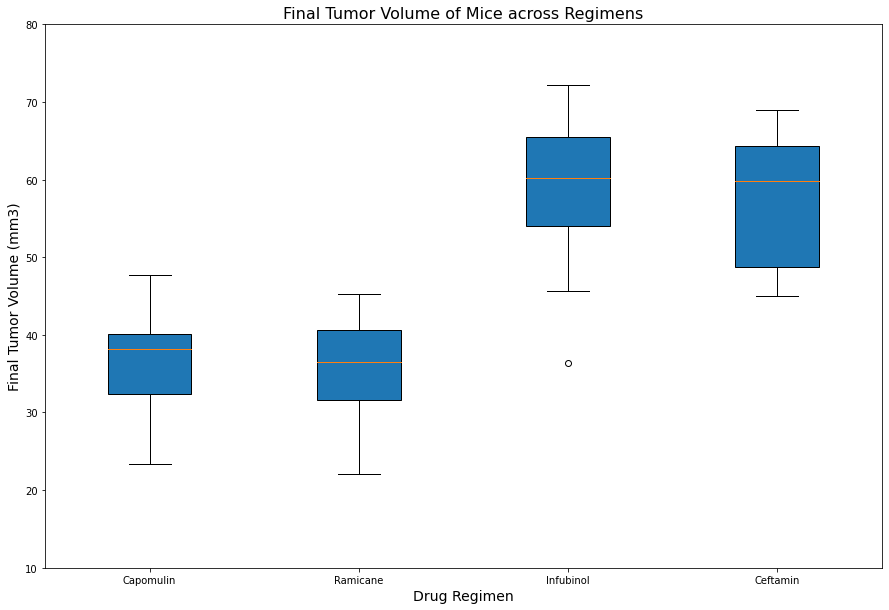

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumor Volume of Mice across Regimens',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

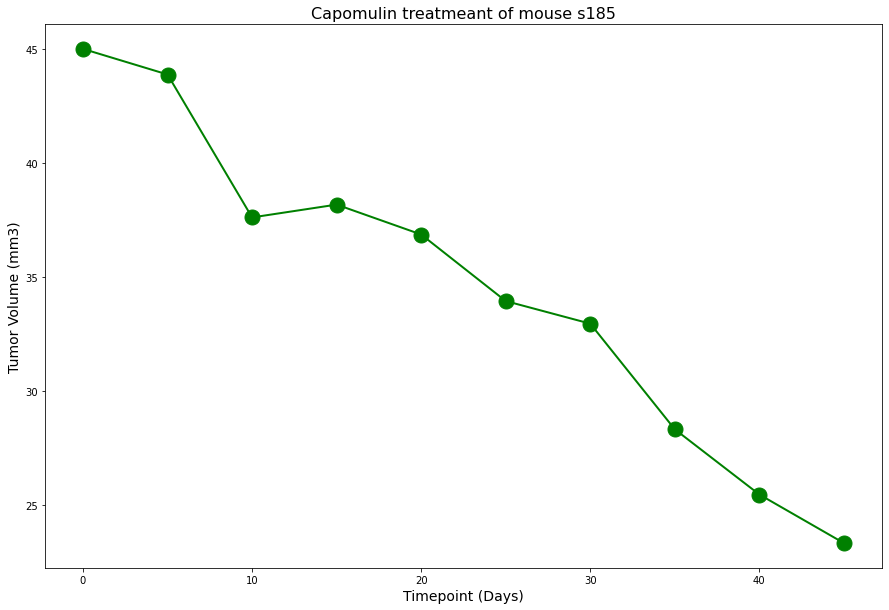

In [116]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]

x_axis = Capomulin_mouse_df["Timepoint"]
tumor_volume = Capomulin_mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse s185',fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=15,marker="o",color="green", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

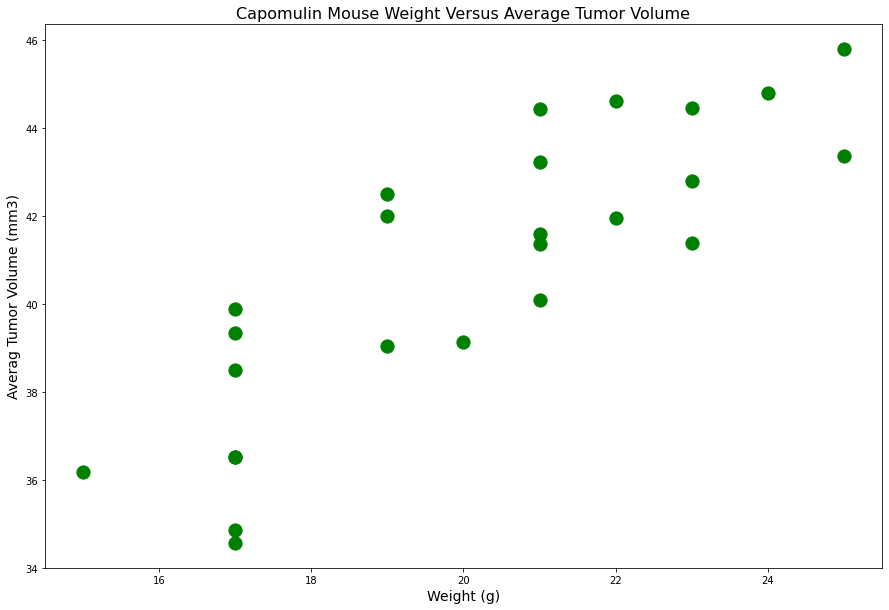

In [117]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_Capomulin_volume =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_Capomulin_volume['Weight (g)'],avg_Capomulin_volume['Tumor Volume (mm3)'],s=175, color="green")
plt.title('Capomulin Mouse Weight Versus Average Tumor Volume',fontsize =16)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)



## Correlation and Regression

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_Capomulin_volume['Weight (g)'],avg_Capomulin_volume['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [119]:
#Constuct Linear Regression Model
x_values = avg_Capomulin_volume["Weight (g)"]
y_values = avg_Capomulin_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Print equation parameters
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

#Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)



slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


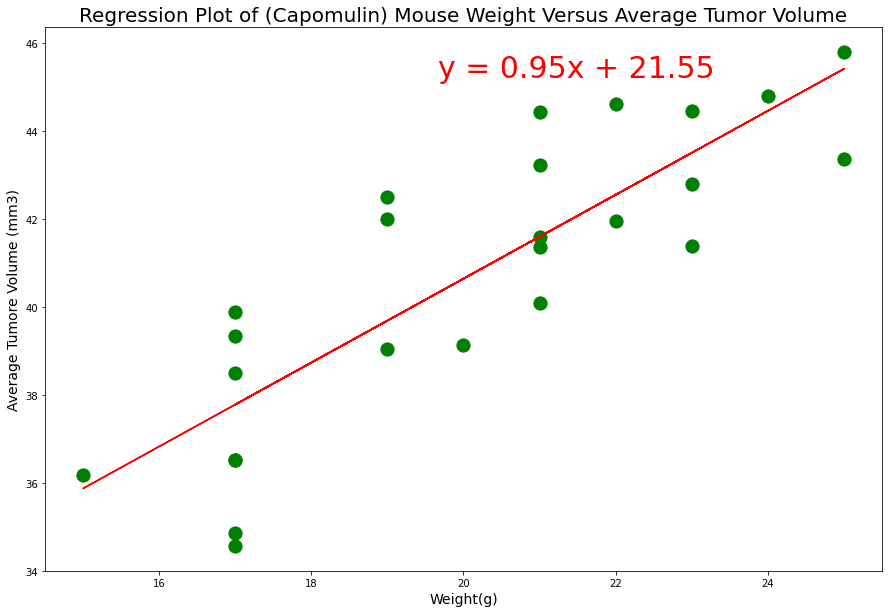

In [120]:
# Plot the line and linear regression equation 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of (Capomulin) Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()